                                                    Regresion Lineal

La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una.

El ejemplo que vamos a utilizar a continuación es un modelo de Machine Learning que será entrenado para descubrir como convertir grados Celsius a grafos Fahrenheit.
 
Fahrenheit	°F = 1,8°C + 32°
Celsius	°C =5/9(°F-32°)

Aunque nosotros tenemos la formula y sabemos como proceder, el modelo ignora completamente el procedimiento, y aprenderá a ajustar sus nodos de acuerdo a los resultados de los datos de salida con respecto a los datos de entrada.

In [12]:
#                Modelo de programación convencional para la transformación de grados.

# Escogemos el tipo de variable, en este caso indicamos si los valores estan representados en Celcius o en Fahrenheit.
rta = input(str("Ingresa el tipo de escala de temperatura de la cual conoces los grados, (C) para Celsius o (F) para Fahrenheit: "))

# Asignamos el valor en grados de la magnitud.
grados = int(input("Ingrese cantidad de grados: "))
print(grados)

# Pasamos a mayuscula la primera respuesta
rta2=rta.upper()

#ahora creamos un ciclo condicional que dependiendo del procedimiento mostrara un resultado ajustado.
if rta2 =="C":
    resultado = 1.8 * grados + 32
    print(f"El resultado de la conversion es: {resultado}")
elif rta2 =="F":
    resultado = 5/9*(grados-32)
    print(f"El resultado de la conversion es: {resultado}")
else:
    print("Resultado equivocado, reinicia el programa.")
    
print("Fin del programa")    

14
El resultado de la conversion es: 57.2
Fin del programa


                 Modelo programado o asociado al Machine Learing
                 
En este siguiente caso usaremos el aprendizaje automático para que el sistema pueda realizar la conversión de forma correcta, se le entregaran datos de entrada y datos de salida con respecto a los datos de entrada, de esta forma l sistema podrá entrenarse de forma correcta. 

In [13]:
#              Modelo de Machine Learning para conversor de magnitudes de temperatura.
# importamos la primera libreria que vamos a utilizar para leer el archivo .csv
import pandas as pd

# Ejecutamos el comando de lectrura de archivo .csv 
datos = pd.read_csv("celcius.csv")

# Podemos utilizar la funcion .info() para mostrar los metadatos del dataframe  
datos.info()

# Utilizamos datos .head() para dar un vistazo superficial a los datos.
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   celcius     10 non-null     int64  
 1   fahrenheit  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


,celcius,fahrenheit
0,-40,-40.0
1,-10,12.2
2,1,33.8
3,3,37.4
4,5,41.0



                                     Realizaremos un grafico

Procederemos a crear un gráfico con la librería seaborn en la relación de nuestras dos variables: Celsius y Fahrenheit.


<Axes: xlabel='celcius', ylabel='fahrenheit'>

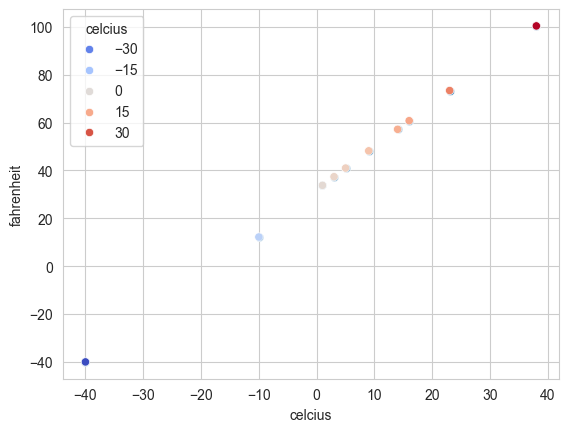

In [14]:
# debemos importar la libreria seaborn
import seaborn as sb
# Con esta linea creamos la grafica indicacondo que use datos y grafique X y Y
sb.scatterplot(x="celcius",y="fahrenheit",data=datos)
# Con esta linea creamos la grafica anterior pero gregamos agrupacion por color hue="{}"
sb.scatterplot(x="celcius",y="fahrenheit",data=datos, hue="celcius",palette="coolwarm")

                                        Caracterizar nuestros datos

Procederemos a separar los datos en sus caracteristicas, en este momento solo los podemos divivir en 2, F y C.


In [15]:
# se ajustan los ejes a sus respectivas variables.
x = datos["celcius"]
y = datos["fahrenheit"]
# Debemos trasformar el arreglo x a una matrix para poder ser procesado por el modelo.
# para ello utilizaremos la funcion X.values.reshape(-1,1), lo que devilvera la matrix
x_procesada = x.values.reshape(-1,1)
y_procesada = y.values.reshape(-1,1)
#Verificamos que sean una matrix
print(x_procesada,y_procesada)

[[-40]
 [-10]
 [  1]
 [  3]
 [  5]
 [  9]
 [ 14]
 [ 16]
 [ 23]
 [ 38]] [[-40. ]
 [ 12.2]
 [ 33.8]
 [ 37.4]
 [ 41. ]
 [ 48.2]
 [ 57.2]
 [ 60.8]
 [ 73.4]
 [100.4]]


                                         Modelo

Los datos estan listos, esto indica que podemos proceder con el modelo, asi que usemos sklearn para crearlo

In [17]:
# Importamos LinearRegression
from sklearn.linear_model import LinearRegression

#definimo el modelo como: LinearRegression
modelo = LinearRegression()

# ahora realizaremos el entrenamiento con la funcion fit
modelo.fit(x_procesada,y_procesada)

LinearRegression()

In [20]:
# una vez que el modelo esta entrenado procederemos con la ejecución de predicción. (probaremos con un numero ya conocido)
modelo.predict([[9]])

array([[48.04279072]])

In [21]:
# una vez que el modelo esta entrenado podemos utilizar una uncion para verificar que tan bien entrenado queo el modelo
modelo.score(x_procesada, y_procesada)

0.9997872787098528